# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
City not found. Skipping...
Processing Record 3 of Set 1 | north battleford
City not found. Skipping...
Processing Record 4 of Set 1 | harper
City not found. Skipping...
Processing Record 5 of Set 1 | argostolion
City not found. Skipping...
Processing Record 6 of Set 1 | pacific grove
City not found. Skipping...
Processing Record 7 of Set 1 | tiksi
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
Processing Record 9 of Set 1 | waitangi
City not found. Skipping...
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
City not found. Skipping...
Processing Record 11 of Set 1 | crane
City not found. Skipping...
Processing Record 12 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 13 of Set 1 | adrar
City not found. Skipping...
Processing Record 14 of 

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [28]:
# Display sample data
city_data_df.head()

""


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

""
City_ID


In [31]:
# Check the column names of the DataFrame
print(city_data_df.columns)

Index([], dtype='object')


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

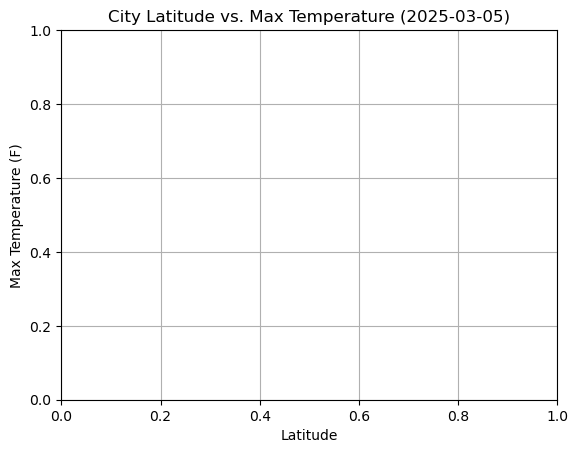

In [37]:

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

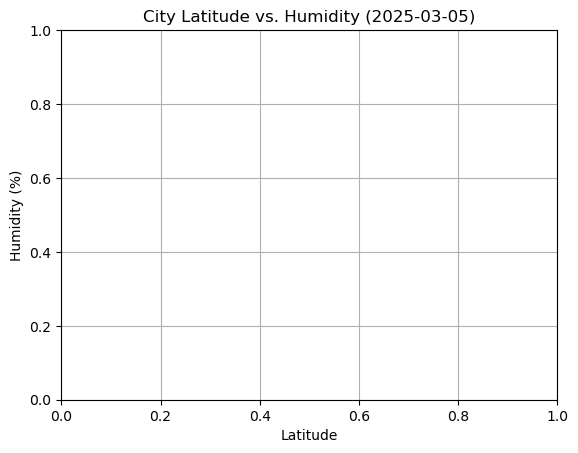

In [42]:

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

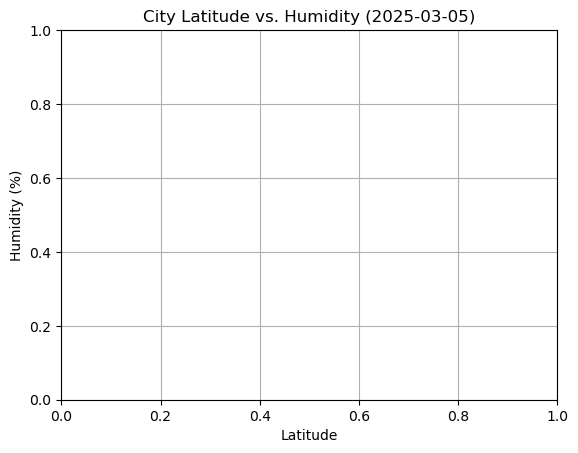

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

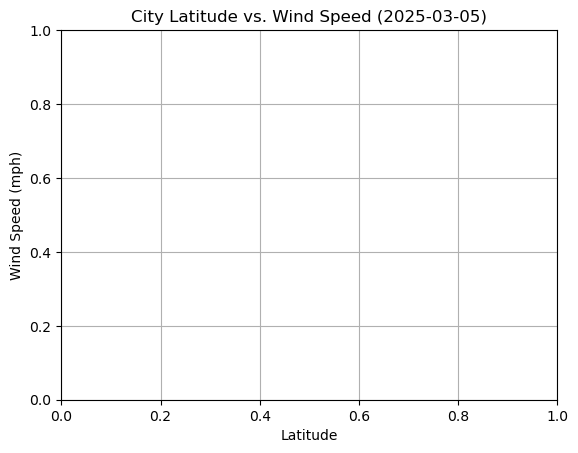

In [45]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, plot_path):
    """
    Creates a scatter plot with a linear regression line.
    
    Parameters:
    x_values (pd.Series): The x values for the plot.
    y_values (pd.Series): The y values for the plot.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    plot_path (str): The file path to save the plot.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(plot_path)
    
    # Show plot
    plt.show()

In [11]:
# Ensure city_data_df is defined
try:
    # Check if city_data_df exists
    city_data_df.head()
except NameError:
    print("Error: city_data_df is not defined. Ensure you have created the DataFrame with weather data.")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
if 'city_data_df' in locals():
    northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

    # Display sample data
    print("Northern Hemisphere DataFrame:")
    print(northern_hemi_df.head())
else:
    print("Cannot create northern_hemi_df because city_data_df is not available.")

Error: city_data_df is not defined. Ensure you have created the DataFrame with weather data.
Cannot create northern_hemi_df because city_data_df is not available.


###  Temperature vs. Latitude Linear Regression Plot

In [13]:
# Max Temp vs. Latitude
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, plot_path):
    """
    Creates a scatter plot with a linear regression line.
    
    Parameters:
    x_values (pd.Series): The x values for the plot.
    y_values (pd.Series): The y values for the plot.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    plot_path (str): The file path to save the plot.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min() + 5, y_values.min() + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(plot_path)
    
    # Show plot
    plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [14]:
# Northern Hemisphere

# Ensure city_data_df is defined
try:
    # Check if city_data_df exists
    city_data_df.head()
except NameError:
    print("Error: city_data_df is not defined. Ensure you have created the DataFrame with weather data.")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
if 'city_data_df' in locals():
    northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

    # Display sample data
    print("Northern Hemisphere DataFrame:")
    print(northern_hemi_df.head())
else:
    print("Cannot create northern_hemi_df because city_data_df is not available.")

Error: city_data_df is not defined. Ensure you have created the DataFrame with weather data.
Cannot create northern_hemi_df because city_data_df is not available.


In [17]:
# Example weather data (replace this with your actual data)
city_data = [
    {"City": "City1", "Lat": 10, "Lng": 20, "Max Temp": 85, "Humidity": 70, "Cloudiness": 10, "Wind Speed": 5, "Country": "US", "Date": "2025-03-14"},
    {"City": "City2", "Lat": -15, "Lng": 30, "Max Temp": 75, "Humidity": 60, "Cloudiness": 20, "Wind Speed": 10, "Country": "BR", "Date": "2025-03-14"},
    # Add more city data here
]

# Convert the list of dictionaries into a DataFrame
import pandas as pd
city_data_df = pd.DataFrame(city_data)

# Display the first few rows of the DataFrame
print(city_data_df.head())

    City  Lat  Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
0  City1   10   20        85        70          10           5      US   
1  City2  -15   30        75        60          20          10      BR   

         Date  
0  2025-03-14  
1  2025-03-14  


In [18]:
# Print the column names of city_data_df
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
print(northern_hemi_df.head())

    City  Lat  Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
0  City1   10   20        85        70          10           5      US   

         Date  
0  2025-03-14  


In [20]:
# Southern Hemisphere

# Ensure city_data_df is defined
try:
    # Check if city_data_df exists
    city_data_df.head()
except NameError:
    print("Error: city_data_df is not defined. Ensure you have created the DataFrame with weather data.")

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
if 'city_data_df' in locals():
    southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

    # Display sample data
    print("Southern Hemisphere DataFrame:")
    print(southern_hemi_df.head())
else:
    print("Cannot create southern_hemi_df because city_data_df is not available.")

Southern Hemisphere DataFrame:
    City  Lat  Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
1  City2  -15   30        75        60          20          10      BR   

         Date  
1  2025-03-14  


In [24]:
# Print the column names of city_data_df
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
print("Southern Hemisphere DataFrame:")
print(southern_hemi_df.head())

Southern Hemisphere DataFrame:
    City  Lat  Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
1  City2  -15   30        75        60          20          10      BR   

         Date  
1  2025-03-14  


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


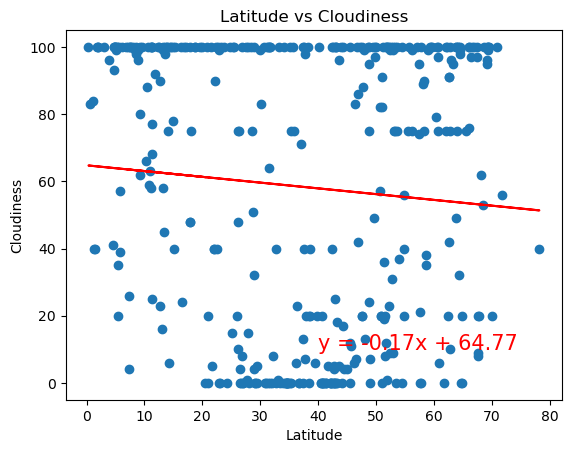

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


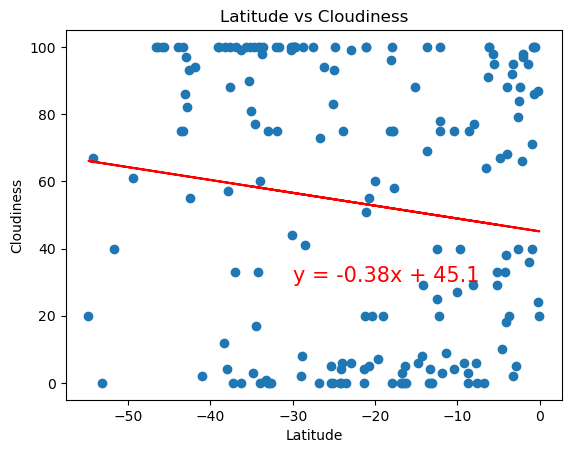

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


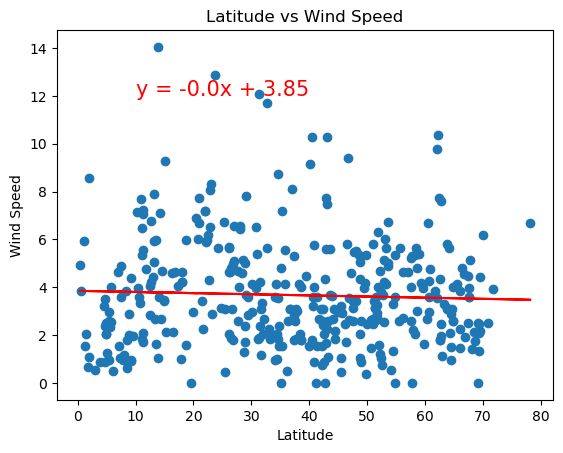

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


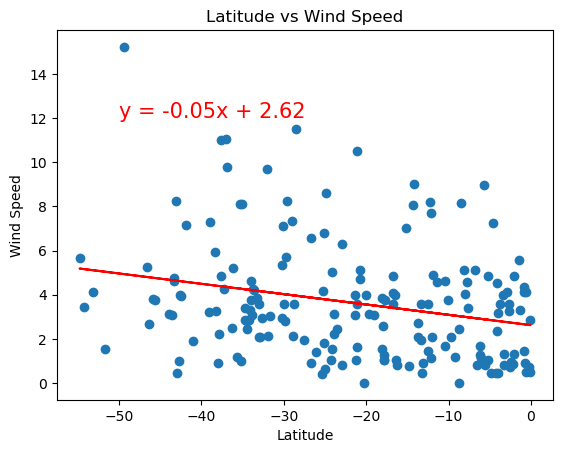

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE